# HW7 IBM Quantum Experience
___
Make sure to add your IBM quantum experience credentials to run on real backends
<br>
```from qiskit import IBMQ
IBMQ.save_account('ACCOUNT_API_KEY')```

In [178]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from qiskit.quantum_info import Statevector, random_statevector
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_state_qsphere, plot_state_city
from qiskit.circuit.library import iSwapGate
import numpy as np
import matplotlib.pyplot as plt
import itertools

%matplotlib inline

## Toffoli Circuit From HW3 Problem 6a

In [179]:
sim = Aer.get_backend('statevector_simulator')

toffoli = QuantumCircuit(3)
toffoli.h([2])
toffoli.cx([1], [2])
toffoli.tdg([2])
toffoli.cx([0], [2])
toffoli.t([2])
toffoli.cx([1], [2])
toffoli.tdg([2])
toffoli.cx([0], [2])
toffoli.tdg([1])
toffoli.t([2])
toffoli.cx([0], [1])
toffoli.h([2])
toffoli.tdg([1])
toffoli.cx([0], [1])
toffoli.t([0])
toffoli.s([1])

results = []
circuits = []

basis_states = [''.join(s) for s in itertools.product('01', repeat=3)]

for state in basis_states:
    
    circ = QuantumCircuit(3)
    circ.initialize(Statevector.from_label(state).data, [0,1,2])
    circ = circ + toffoli
    circuits.append(circ)
    results.append(execute(circ, sim).result())

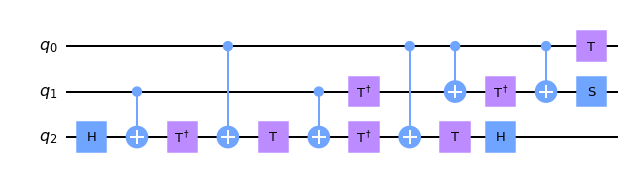

In [180]:
toffoli.draw('mpl')

Input state: 000


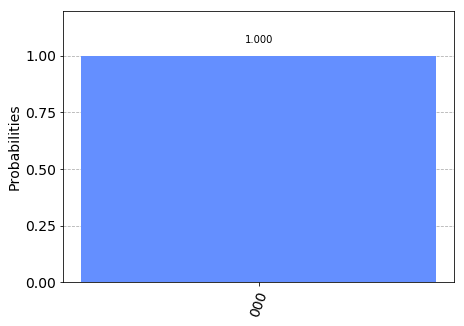

Input state: 001


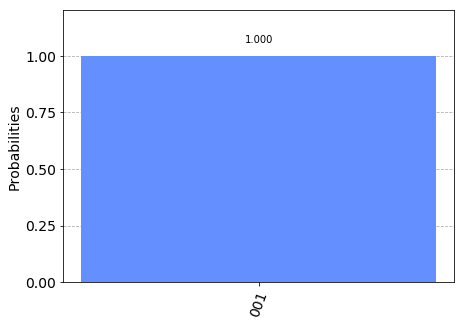

Input state: 010


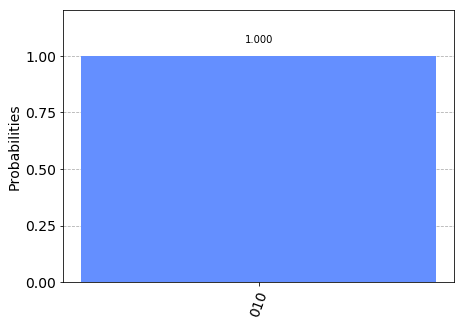

Input state: 011


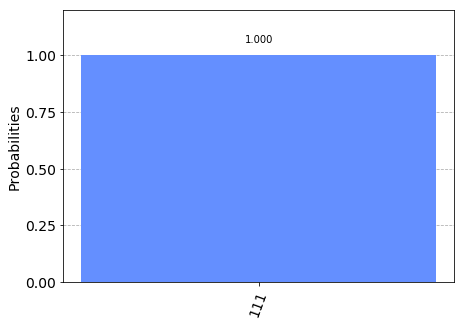

Input state: 100


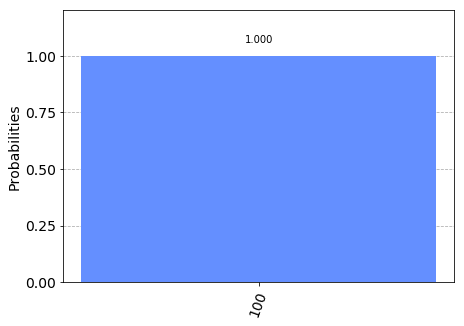

Input state: 101


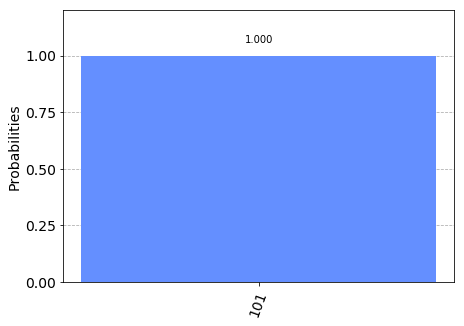

Input state: 110


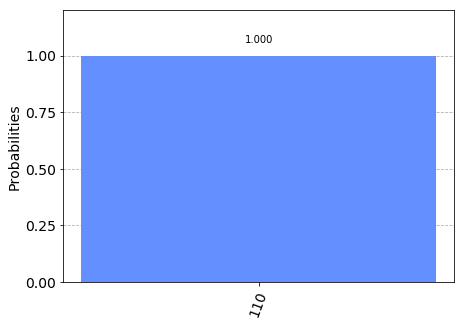

Input state: 111


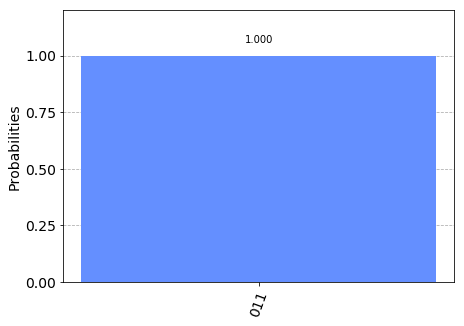

In [181]:
for state, res in zip(basis_states, results):
    print(f'Input state: {state}')
    display(plot_histogram(res.get_counts()))

## Phase Offset Toffoli Circuit From HW3 Problem 6b

In [182]:
toffoli2 = QuantumCircuit(3)
toffoli2.ry(np.pi/4, [2])
toffoli2.cx([1], [2])
toffoli2.ry(np.pi/4, [2])
toffoli2.cx([0], [2])
toffoli2.ry(-np.pi/4, [2])
toffoli2.cx([1], [2])
toffoli2.ry(-np.pi/4, [2])

results2 = []
circuits2 = []

for state in basis_states:
    
    circ = QuantumCircuit(3)
    circ.initialize(Statevector.from_label(state).data, [0,1,2])
    circ = circ + toffoli2
    circuits2.append(circ)
    results2.append(execute(circ, sim).result())

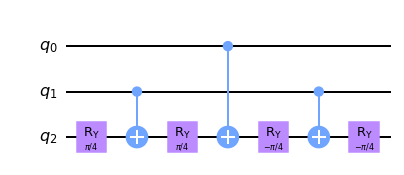

In [183]:
toffoli2.draw('mpl')

Input state: 000


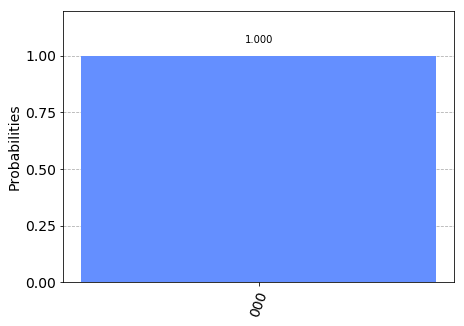

Input state: 001


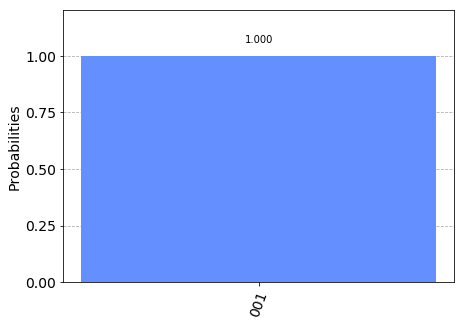

Input state: 010


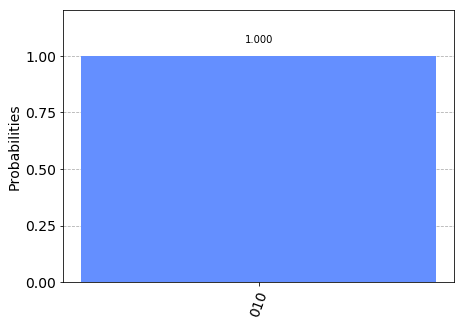

Input state: 011


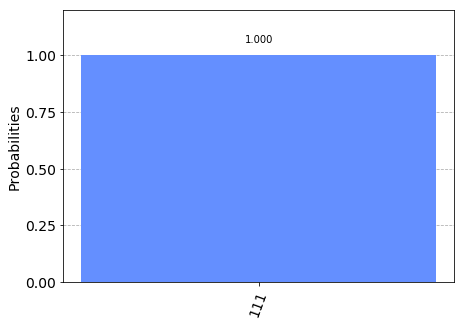

Input state: 100


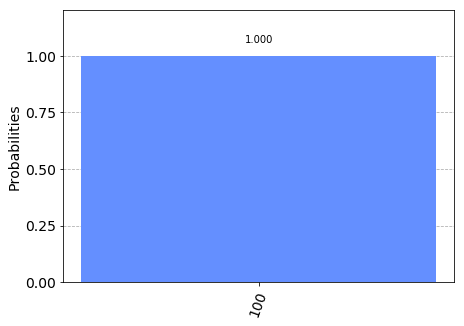

Input state: 101


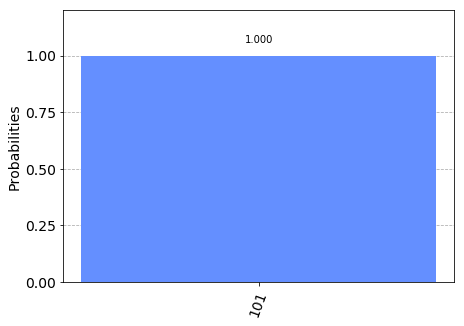

Input state: 110


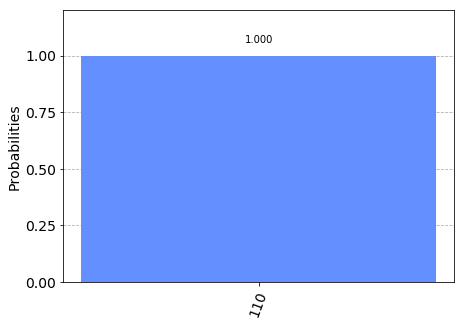

Input state: 111


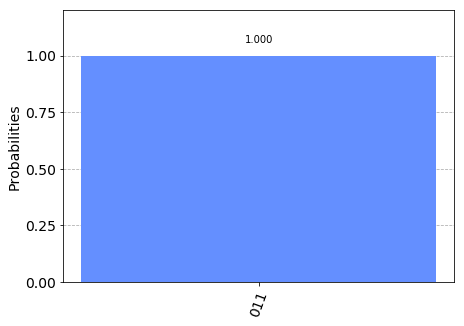

In [184]:
for state, res in zip(basis_states, results2):
    print(f'Input state: {state}')
    display(plot_histogram(res.get_counts()))

In [185]:
# Compare the results
for state, res1, circ1, res2, circ2 in zip(basis_states, results, circuits, results2, circuits2):
    print(f'Input state: {state}')
    s1, s2 = res1.get_statevector(circ1, decimals=3), res2.get_statevector(circ2, decimals=3)
    print(f'Output of toffoli is: {s1}')
    print(f'Output of phase offset toffoli is: {s2}')
    print('\n')

Input state: 000
Output of toffoli is: [1.00000000e+00-6.123234e-17j 0.00000000e+00+0.000000e+00j
 0.00000000e+00+0.000000e+00j 0.00000000e+00+0.000000e+00j
 1.67155782e-16+6.123234e-17j 0.00000000e+00+0.000000e+00j
 0.00000000e+00+0.000000e+00j 0.00000000e+00+0.000000e+00j]
Output of phase offset toffoli is: [1.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 2.96506192e-17+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j]


Input state: 001
Output of toffoli is: [0.00000000e+00+0.000000e+00j 1.00000000e+00-6.123234e-17j
 0.00000000e+00+0.000000e+00j 0.00000000e+00+0.000000e+00j
 0.00000000e+00+0.000000e+00j 6.22328532e-19+6.123234e-17j
 0.00000000e+00+0.000000e+00j 0.00000000e+00+0.000000e+00j]
Output of phase offset toffoli is: [ 0.0000000e+00+0.j  1.0000000e+00+0.j  0.0000000e+00+0.j
  0.0000000e+00+0.j  0.0000000e+00+0.j -1.2420623e-16+0.j
  0.0000000e+00+0.j  0.0000000e+00+0.j]


Input state: 010
Output of toffoli is: [0.00000000e+00+0.00000

## Bell Circuit From HW4 Problem 1a

In [186]:
circ1 = QuantumCircuit(2)

circ1.reset([0])
circ1.reset([1])

circ1.ry(np.pi/2, [1])
circ1.ry(np.pi/2, [0])
circ1.x([1])
circ1.cz([0], [1])
circ1.x([1])
circ1.ry(np.pi/2,[0])

circ2 = QuantumCircuit(2)

circ2.reset([0])
circ2.reset([1])

circ2.h([0])
circ2.cx([0],[1])

res1, res2 = execute(circ1, sim).result(), execute(circ2, sim).result()

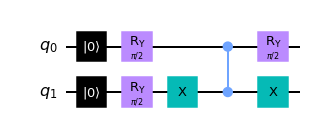

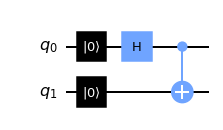

In [187]:
display(circ1.draw('mpl'))
display(circ2.draw('mpl'))

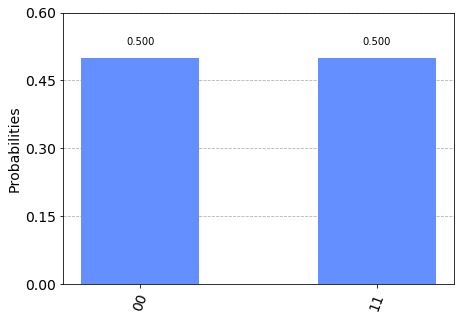

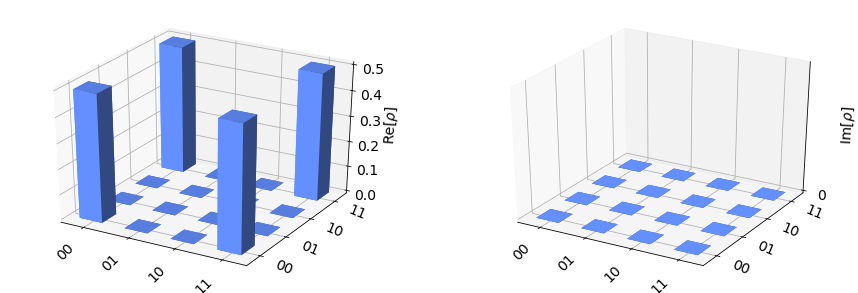

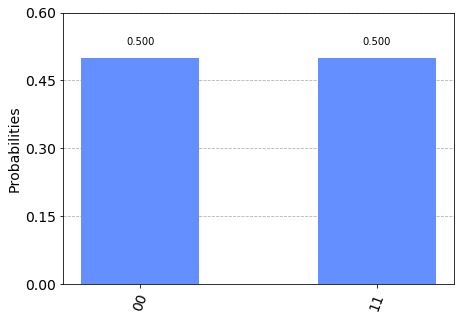

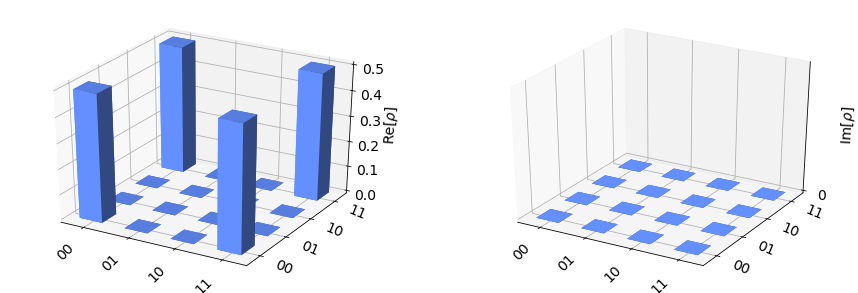

In [188]:
# They both Produce the bell state
sv1 = res1.get_statevector(circ1, decimals=3)
sv2 = res2.get_statevector(circ2, decimals=3)
display(plot_histogram(res1.get_counts()))
display(plot_state_city(sv1))
display(plot_histogram(res2.get_counts()))
display(plot_state_city(sv2))

In [189]:
# But they don't evalaute the same on the entire basis...
circ1 = QuantumCircuit(2)

circ1.initialize(Statevector.from_label('01').data, [0, 1])

circ1.ry(np.pi/2, [1])
circ1.ry(np.pi/2, [0])
circ1.x([1])
circ1.cz([0], [1])
circ1.x([1])
circ1.ry(np.pi/2,[0])

circ2 = QuantumCircuit(2)

circ2.initialize(Statevector.from_label('01').data, [0, 1])


circ2.h([0])
circ2.cx([0],[1])

res1, res2 = execute(circ1, sim).result(), execute(circ2, sim).result()

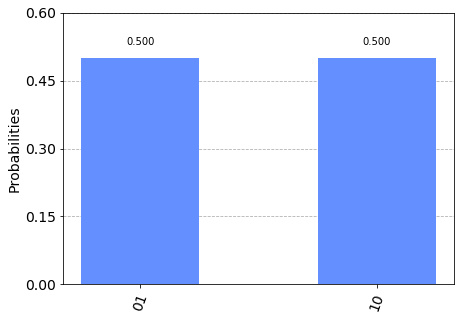

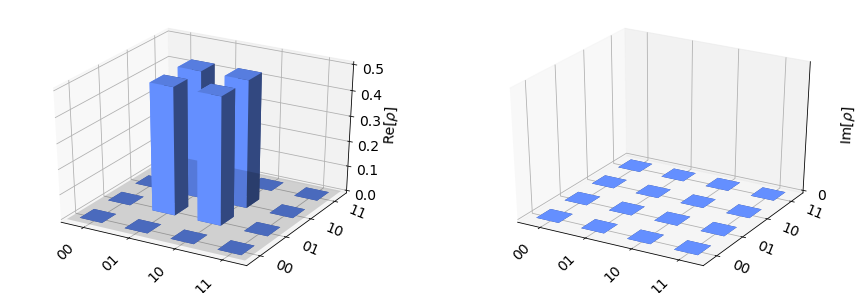

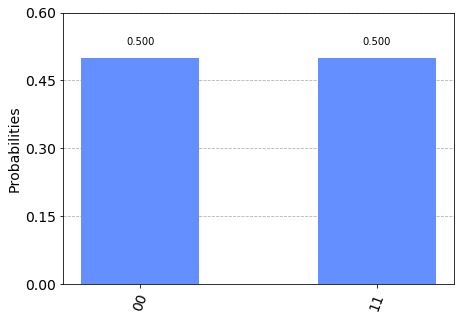

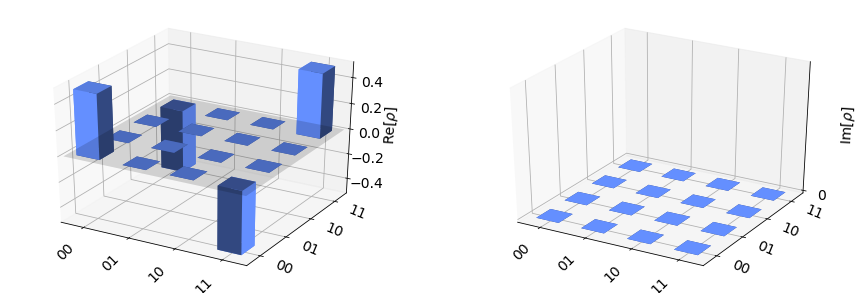

In [190]:
sv1 = res1.get_statevector(circ1, decimals=3)
sv2 = res2.get_statevector(circ2, decimals=3)
display(plot_histogram(res1.get_counts()))
display(plot_state_city(sv1))
display(plot_histogram(res2.get_counts()))
display(plot_state_city(sv2))

## GHZ Circuits From HW4 Problem 1b

In [191]:
circ1 = QuantumCircuit(3)

circ1.ry(np.pi/2, [0])
circ1.ry(np.pi/2, [1])
circ1.ry(np.pi/2, [2])

circ1.x([1])
circ1.cz([0], [1])
circ1.x([1])

circ1.x([1])
circ1.cz([2], [1])
circ1.x([1])

circ1.ry(np.pi/2, [0])
circ1.ry(np.pi/2, [2])

circ2 = QuantumCircuit(3)

circ2.ry(np.pi/2, [0])
circ2.ry(np.pi/2, [1])
circ2.ry(np.pi/2, [2])

# we defined the iSwapGate in class to be the inverse of what qiskit defined it as
circ2.append(iSwapGate().inverse(), [[0], [1]], [])
circ2.append(iSwapGate().inverse(), [[1], [2]], [])

circ2.rx(-np.pi/2, [0])
circ2.rx(-np.pi/2, [1])

circ3 = QuantumCircuit(3)

circ3.h([0])
circ3.cx([0], [1])
circ3.cx([1], [2])

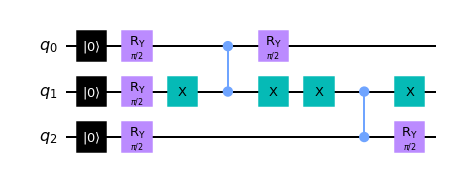

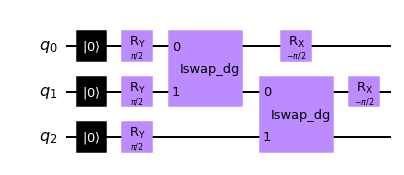

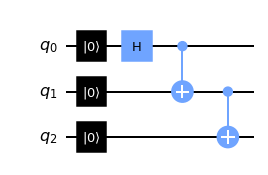

In [192]:
# On the state 000
results = []
circuits = []
for c in (circ1, circ2, circ3):
    circ = QuantumCircuit(3)
    circ.reset([0])
    circ.reset([1])
    circ.reset([2])
    circ = circ + c
    display(circ.draw('mpl'))
    circuits.append(circ)
    results.append(execute(circ, sim).result())

In [193]:
sv1, sv2, sv3 = (results[i].get_statevector(circuits[i], decimals=3) for i in range(3))
res1, res2, res3 = results

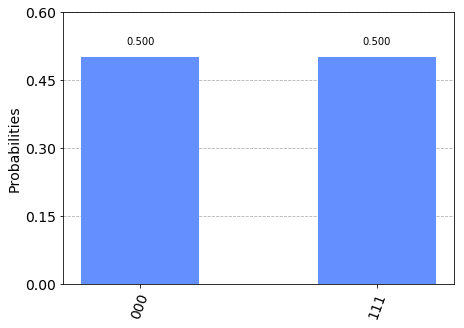

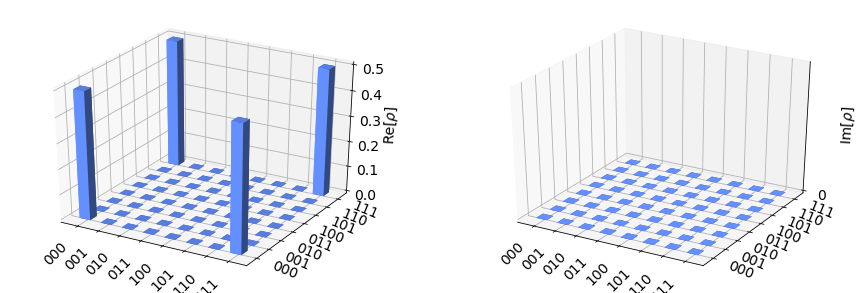

In [194]:
display(plot_histogram(res1.get_counts()))
display(plot_state_city(sv1))

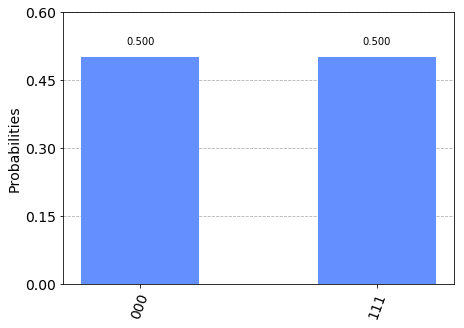

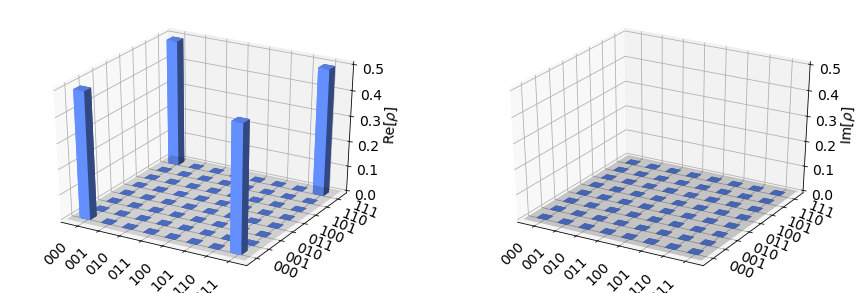

In [195]:
display(plot_histogram(res2.get_counts()))
display(plot_state_city(sv2))

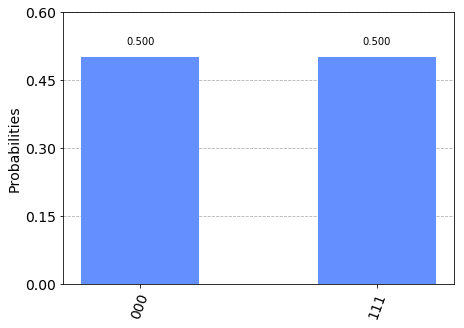

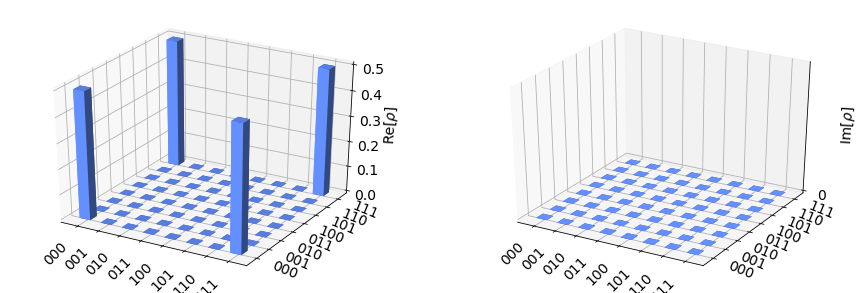

In [196]:
display(plot_histogram(res3.get_counts()))
display(plot_state_city(sv3))

In [197]:
# but they're not the same on all basis states
results = []
circuits = []
for c in (circ1, circ2, circ3):
    circ = QuantumCircuit(3)
    circ.initialize(Statevector.from_label('010').data, [0,1,2])
    circ = circ + c
    circuits.append(circ)
    results.append(execute(circ, sim).result())
sv1, sv2, sv3 = (results[i].get_statevector(circuits[i], decimals=3) for i in range(3))
res1, res2, res3 = results

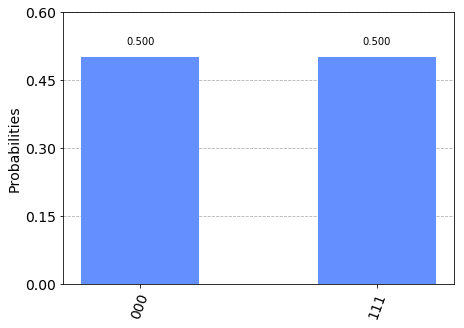

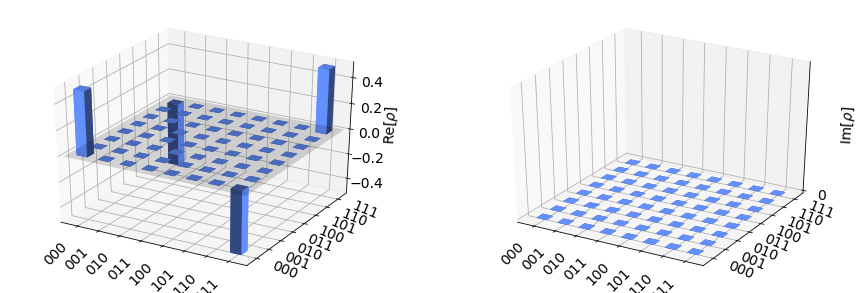

In [198]:
display(plot_histogram(res1.get_counts()))
display(plot_state_city(sv1))

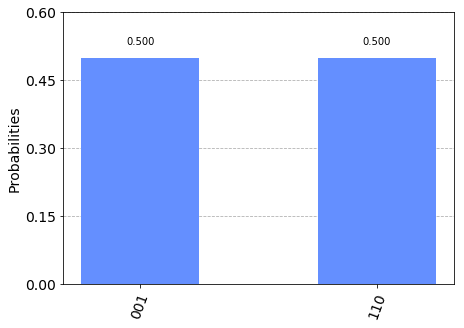

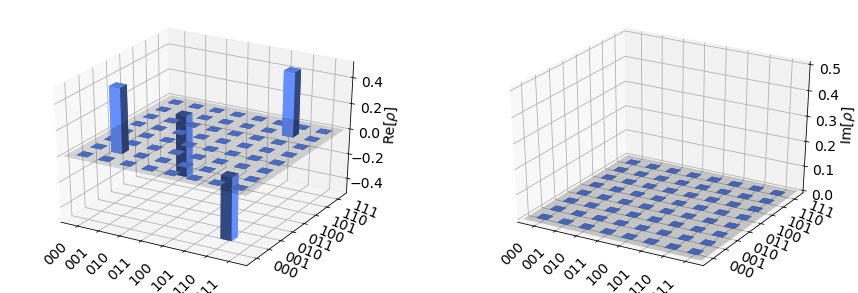

In [199]:
display(plot_histogram(res2.get_counts()))
display(plot_state_city(sv2))

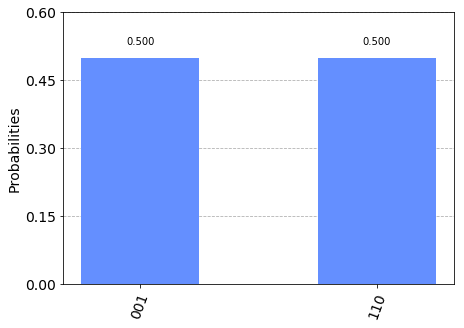

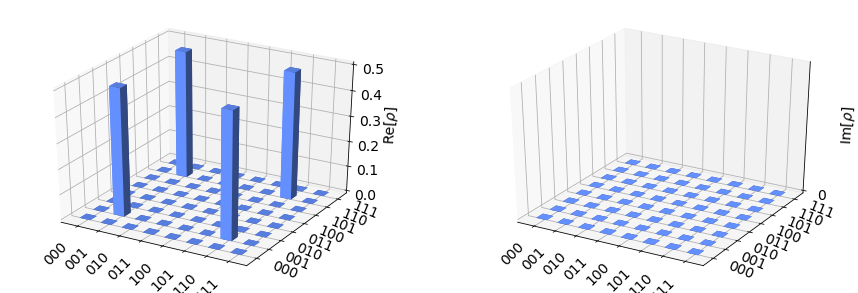

In [200]:
display(plot_histogram(res3.get_counts()))
display(plot_state_city(sv3))

## W State Circuit from HW4 Problem 2b

In [201]:
# First need to make the exponential matrix operator
from scipy.linalg import expm
from qiskit.extensions import UnitaryGate

sx = np.array([[0, 1],[1, 0]])
sy = np.array([[0, -1j],[1j, 0]])
sz = np.array([[1, 0],[0, -1]])
S = .5 * (np.kron(np.eye(2), np.kron(sx, sx)) + np.kron(sx, np.kron(np.eye(2), sx)) + np.kron(sx, np.kron(sx, np.eye(2)))
    + np.kron(np.eye(2), np.kron(sy, sy)) + np.kron(sy, np.kron(np.eye(2), sy)) + np.kron(sy, np.kron(sy, np.eye(2))))
G = UnitaryGate(expm(-1j * np.pi/2 * 4/9 * S), label = 'Exp')

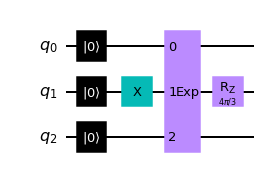

In [202]:
wcircuit = QuantumCircuit(3)
wcircuit.reset([0])
wcircuit.reset([1])
wcircuit.reset([2])

wcircuit.x([1])
wcircuit.append(G, [[0], [1], [2]])
wcircuit.rz(4 * np.pi/3, [1])
wcircuit.draw('mpl')

In [203]:
res = execute(wcircuit, sim).result()

In [204]:
sv = res.get_statevector(wcircuit, decimals=3)

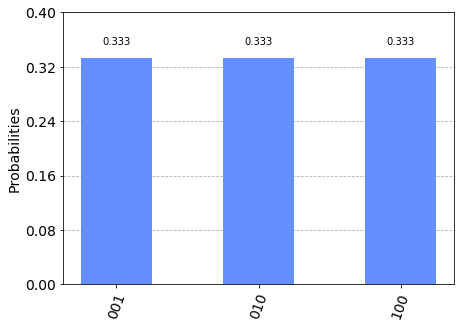

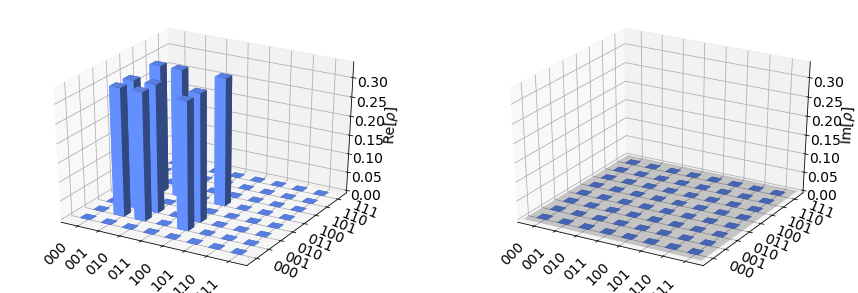

In [205]:
display(plot_histogram(res.get_counts()))
display(plot_state_city(sv))

## Grover Circuit (2 qubit search space)

In [206]:
a = '11'

initphi = QuantumCircuit(3, 2)
initphi.reset([0])
initphi.reset([1])
initphi.reset([2])
initphi.x([2])
initphi.h([0, 1, 2])

uf = QuantumCircuit(3, 2)
uf.ccx([0], [1], [2])

grover = QuantumCircuit(3, 2)
grover.h([0, 1])
grover.x([0, 1])
grover.cz([0], [1])
grover.x([0, 1])
grover.h([0, 1])


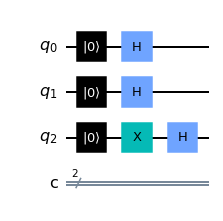

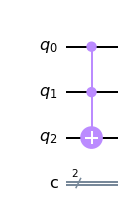

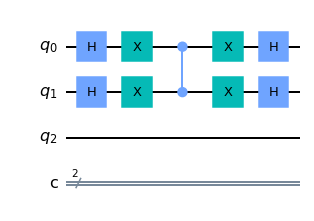

In [207]:
display(initphi.draw('mpl'))
display(uf.draw('mpl'))
display(grover.draw('mpl'))

In [208]:
iterations = int((np.pi/4) * 2**2/2)

In [211]:
circ = initphi
for _ in range(iterations):
    circ = circ + uf + grover
circ.measure([0, 1], [0, 1])

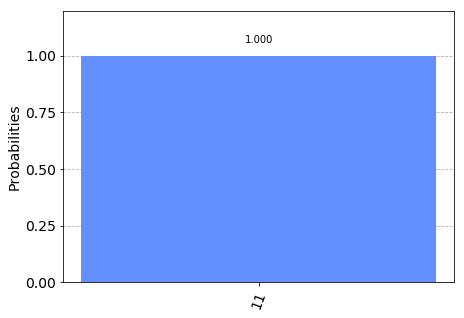

In [212]:
# on a qasm simulator
qasm_sim = Aer.get_backend('qasm_simulator')
shots = 1024
res = execute(circ, backend=qasm_sim, shots=shots).result()
plot_histogram(res.get_counts())

## Bell State Circuits From HW6 Problem 2

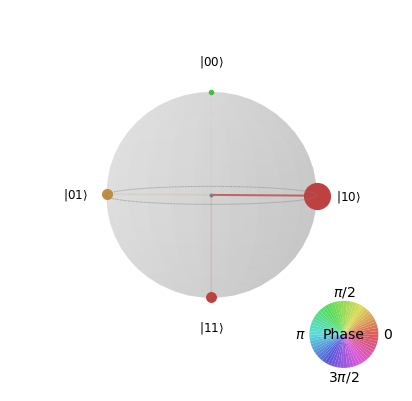

In [213]:
# random state for testing
rng_state = random_statevector(4)
plot_state_qsphere(rng_state.data)

In [214]:
circ1 = QuantumCircuit(4, 2)
circ1.reset([0])
circ1.reset([1])
circ1.initialize(rng_state.data, [2, 3])
circ1.h([0, 1])
circ1.cx([0], [2])
circ1.cx([0], [3])
circ1.cz([1], [2])
circ1.cz([1], [3])
circ1.h([0, 1])
circ1.measure([0, 1], [0, 1])

circ2 = QuantumCircuit(4, 2)
circ2.reset([0])
circ2.reset([1])
circ2.initialize(rng_state.data, [2, 3])
circ2.h([0])
circ2.cx([0], [2])
circ2.cx([0], [3])
circ2.h([0])
circ2.cx([2], [1])
circ2.cx([3], [1])
circ2.measure([0, 1], [0, 1])

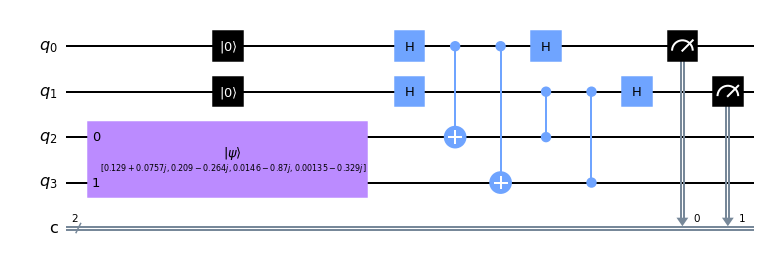

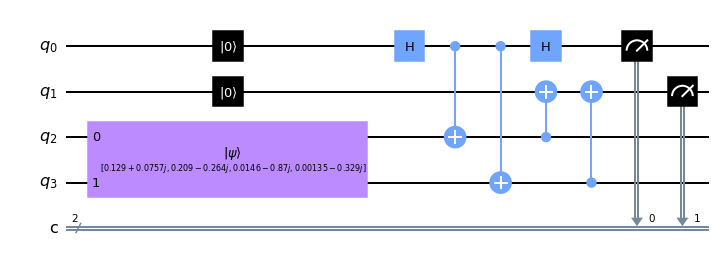

In [215]:
display(circ1.draw('mpl'))
display(circ2.draw('mpl'))

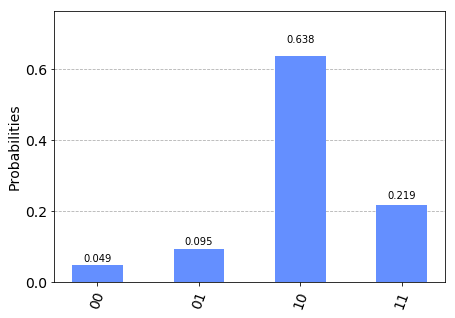

In [216]:
# check that these circuits produce the same measurements
shots = 1024
res = execute(circ1, backend=qasm_sim, shots=shots).result()
plot_histogram(res.get_counts())

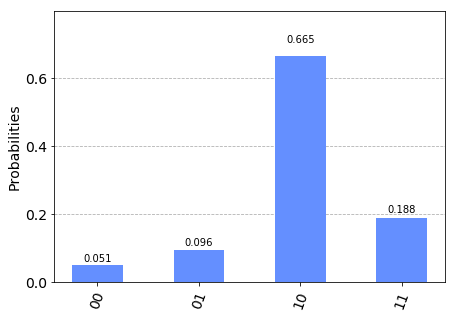

In [217]:
shots = 1024
res = execute(circ2, backend=qasm_sim, shots=shots).result()
plot_histogram(res.get_counts())

## Phase Shift Gates From HW6 Problem 6a

In [218]:
psi = random_statevector(2)
qr = QuantumRegister(4, 'q')
cr = [ClassicalRegister(1, 'a'), ClassicalRegister(1, 'b')]
circ = QuantumCircuit(qr)
circ.add_register(cr[0])
circ.add_register(cr[1])

circ.reset(qr[0])
circ.reset(qr[2])
circ.reset(qr[3])

circ.initialize(psi.data, qr[1])

circ.t(qr[2])

circ.h(qr[0])
circ.cz(qr[0], qr[1])
circ.cz(qr[0], qr[2])
circ.h(qr[0])
circ.measure(qr[0], cr[0])

# This was my answer on the hw
#circ.x(qr[1]).c_if(cr[0], 1)
#circ.z(qr[1]).c_if(cr[0], 1)
#circ.x(qr[1]).c_if(cr[0], 1)
circ.unitary(UnitaryGate(expm(2 * 1j * np.pi/4 * sz)), [qr[1]],).c_if(cr[0], 1)

circ.h(qr[3])
circ.cx(qr[3], qr[2])
circ.h(qr[3])
circ.measure(qr[3], cr[1])



#circ.x(qr[1]).c_if(cr[1], 1)
#circ.z(qr[1]).c_if(cr[1], 1)
#circ.x(qr[1]).c_if(cr[1], 1)


circ.z(qr[1]).c_if(cr[1], 1)

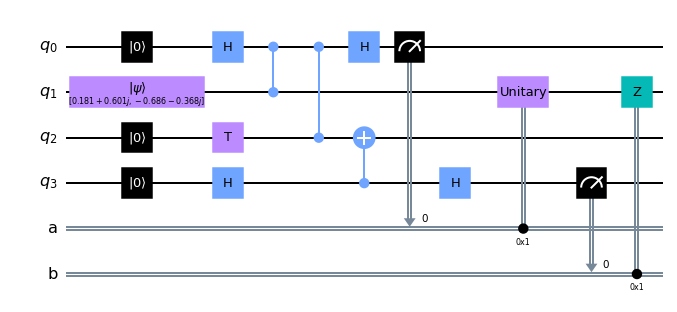

In [219]:
display(circ.draw('mpl'))

In [220]:
result = execute(circ, sim).result()

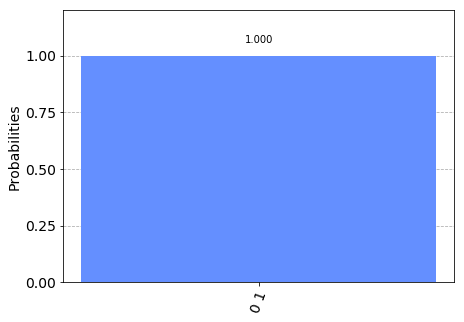

In [221]:
plot_histogram(result.get_counts())

In [162]:
sv = result.get_statevector(circ, decimals=3)

[ 0.00000000e+00-0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j -0.00000000e+00+0.00000000e+00j
  0.00000000e+00-0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j -0.00000000e+00+0.00000000e+00j
 -2.07158896e-01-6.76080758e-01j  0.00000000e+00+0.00000000e+00j
  1.07404556e-17+1.89822091e-17j -0.00000000e+00+0.00000000e+00j
  2.07158896e-01+6.76080758e-01j  0.00000000e+00+0.00000000e+00j
 -1.07404556e-17-1.89822091e-17j -0.00000000e+00+0.00000000e+00j]


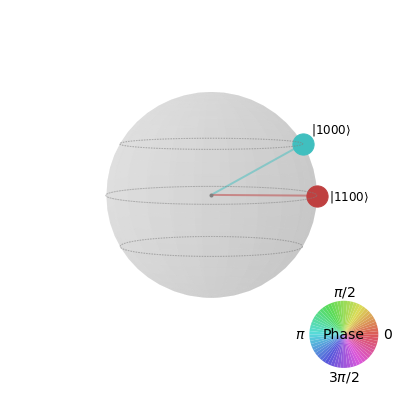

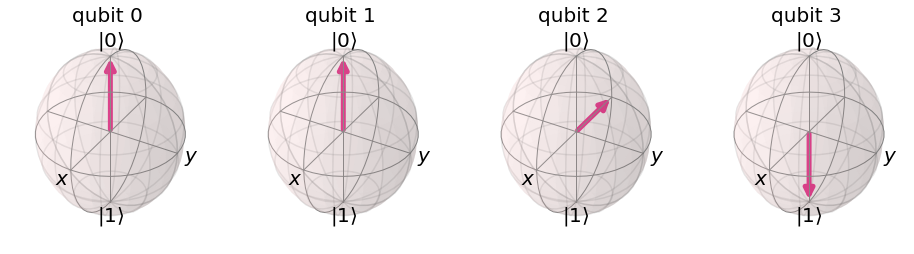

In [163]:
print(sv)
display(plot_state_qsphere(sv))
display(plot_bloch_multivector(sv))

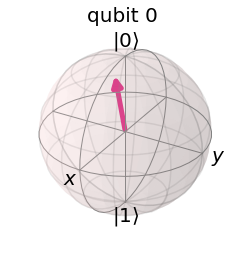

In [164]:
# compare to just T gate
circ2 = QuantumCircuit(1)
circ2.initialize(psi.data, [0])
circ2.t([0])
result2 = execute(circ2, sim).result()
sv2 = result2.get_statevector(circ2, decimals=3)
plot_bloch_multivector(sv2)

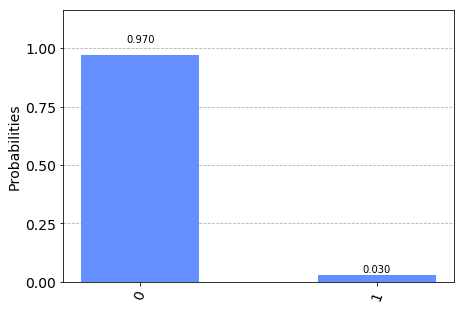

In [165]:
plot_histogram(result2.get_counts())

## $\theta = \frac{\pi}{4}$ Pseudo Toffoli Creation From HW6 Problem 6b

In [166]:
from qiskit.circuit.library import TGate, ZGate, RZGate

circ1 = QuantumCircuit(3)
circ1.cx([2], [1])
circ1.cx([1], [0])
circ1.t([0])
circ1.tdg([1])
circ1.t([2])
circ1.cx([2], [1])
circ1.cx([1], [0])
circ1.tdg([0])
circ1.cx([2], [0])

circ2 = QuantumCircuit(3)
circ2.append(TGate().inverse().power(2).control(1, label='$S^\dagger$'), [0, 1])
circ2.append(ZGate().control(2), [0, 1, 2])

circ3 = QuantumCircuit(3)
circ3.append(RZGate(np.pi).control(2), [0, 1, 2]) # equiv to -iZ

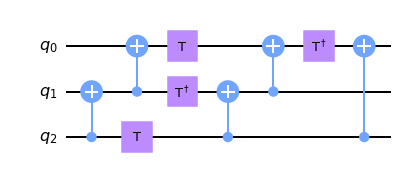

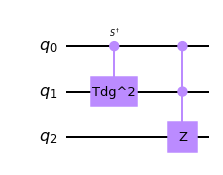

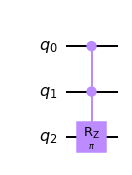

In [167]:
display(circ1.draw('mpl'))
display(circ2.draw('mpl'))
display(circ3.draw('mpl'))

In [168]:
# eval on random state
psi = random_statevector(8)
circuits = []
results = []
for c in (circ1, circ2, circ3):
    circ = QuantumCircuit(3)
    circ.initialize(psi.data, [0, 1, 2])
    circ = circ + c
    circuits.append(circ)
    results.append(execute(circ, sim).result())
sv1, sv2, sv3 = [res.get_statevector(circ, decimals=3) for circ, res in zip(circuits, results)]
res1, res2, res3 = results

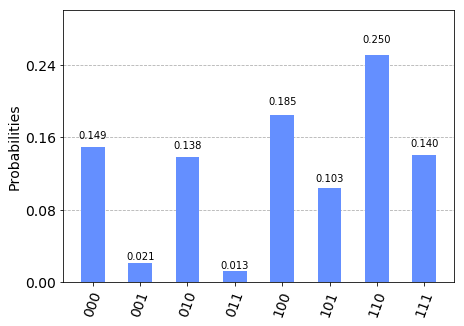

In [169]:
plot_histogram(res1.get_counts())

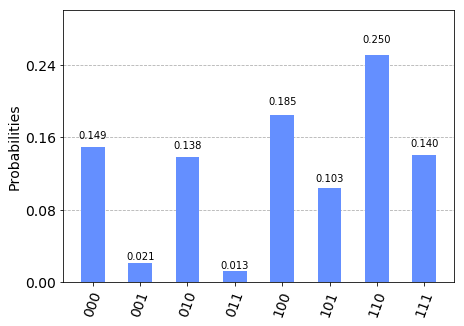

In [170]:
plot_histogram(res2.get_counts())

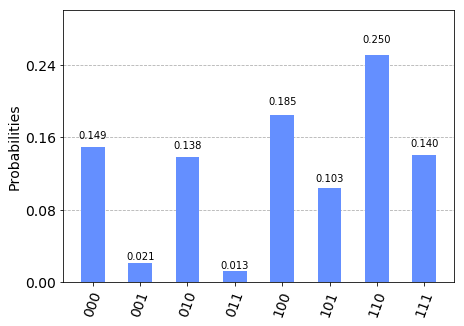

In [171]:
plot_histogram(res3.get_counts())

## Generalized $P_\theta$ From HW6 Problem 6C

In [172]:
# I'll use a 7 bit circuit ==> P operates on 4 qubits, operators chosen at random
from qiskit.circuit.library import XGate, YGate, ZGate
import random
from time import time
random.seed(time())

# random composition of gates
P = [[None, XGate(), YGate(), ZGate()][random.randint(0, 3)] for _ in range(4)]

In [173]:
qr = QuantumRegister(7, 'q')
cr = [ClassicalRegister(1, 'a'), ClassicalRegister(1, 'b')]
circ = QuantumCircuit(qr)
circ.add_register(cr[0])
circ.add_register(cr[1])

# initial states
for i in range(7):
    circ.reset(qr[i])
# theta = pi/4
circ.t(qr[5])
# arbitrary input state to apply Ptheta to
circ.x(qr[1])
circ.h(qr[2])
circ.x(qr[3])
circ.y(qr[4])


circ.h(qr[0])
for i, u in enumerate(P):
    if u is not None:
        circ.append(u.control(1), [qr[0],qr[i+1]])
circ.cz(qr[0], qr[5])
circ.h(qr[0])
circ.measure(qr[0], cr[0])

circ.h(qr[6])
circ.cx(qr[6], qr[5])
circ.h(qr[6])
circ.measure(qr[6], cr[1])

# O1
for i, u in enumerate(P):
    if u is not None:
        circ.append(UnitaryGate(expm(2 * 1j * np.pi/4 * u.to_matrix())).c_if(cr[0], 1), [qr[i + 1]])

# O2
for i, u in enumerate(P):
    if u is not None:
        circ.append(u.c_if(cr[1], 1), [qr[i+1]])

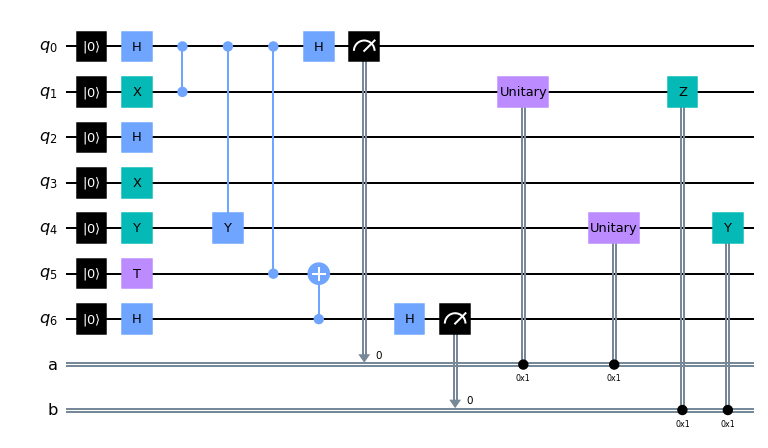

In [174]:
circ.draw('mpl')

In [175]:
result = execute(circ, sim).result()
sv = result.get_statevector(circ, decimals=3)
print(sv)

[ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
 -0.00000000e+00+0.00000000e+00j -0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
 -0.00000000e+00+0.00000000e+00j -0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
 -0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
 -0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
 -0.00000000e+00+0.00000000e+00j -0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
 -0.00000000e+00+0.00000000e+00j -0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
 -0.00000000e+00+0.00000000e+00j -0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
 -0.00000000e+00+0.000000

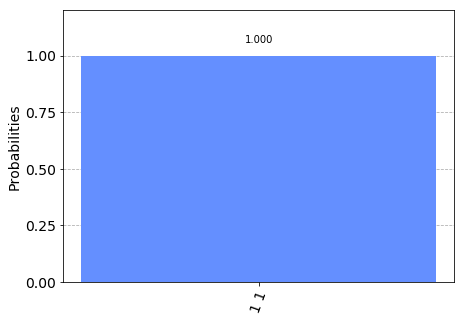

In [176]:
plot_histogram(result.get_counts())

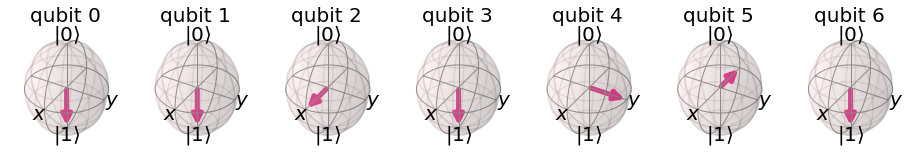

In [177]:
plot_bloch_multivector(sv)